In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.sample(4).T

,1620,5474,4460,108
customerID,6022-KOUQO,4912-PIGUY,0365-GXEZS,8597-CWYHH
gender,Female,Female,Male,Male
SeniorCitizen,0,0,0,0
Partner,Yes,No,Yes,No
Dependents,Yes,No,No,No
tenure,2,1,18,43
PhoneService,No,Yes,Yes,Yes
MultipleLines,No phone service,Yes,No,Yes
InternetService,DSL,Fiber optic,Fiber optic,Fiber optic
OnlineSecurity,No,No,No,No


### Cleaning of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors = 'coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df = df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Total Churn

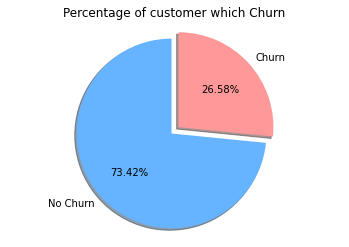

In [9]:
c1 = df['Churn'].to_list()
s= np.array((df['Churn'].value_counts('Yes').to_list()))*100

explode = (0.1, 0)
labels = ["No Churn","Churn"]
colors = ['#66b3ff','#ff9999']

fig, ax = plt.subplots()
ax.pie(s,explode = explode, labels = labels,colors = colors,autopct='%1.2f%%' ,shadow=True, startangle=90)
ax.axis('equal')

plt.title("Percentage of customer which Churn")
plt.show()

### Churn by Gender

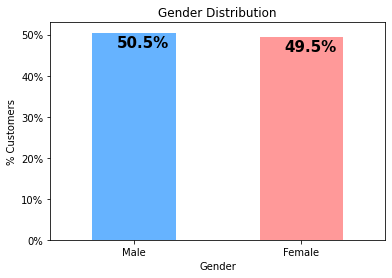

In [10]:
colors = ['#66b3ff','#ff9999']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=15,
            color='black',
           weight = 'bold')

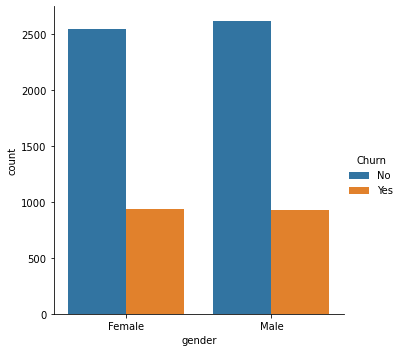

In [11]:
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=df,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

### Churn by Senior Citizen

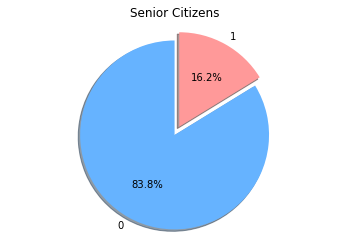

In [12]:
c1 = df['SeniorCitizen'].to_list()
s= np.array((df['SeniorCitizen'].value_counts(0).to_list()))*100

explode = (0.1, 0)
labels = [0,1]
colors = ['#66b3ff','#ff9999']

fig, ax = plt.subplots()
ax.pie(s,explode = explode, labels = labels,colors = colors,autopct='%1.1f%%' ,shadow=True, startangle=90)
ax.axis('equal')

plt.title("Senior Citizens")
plt.show()

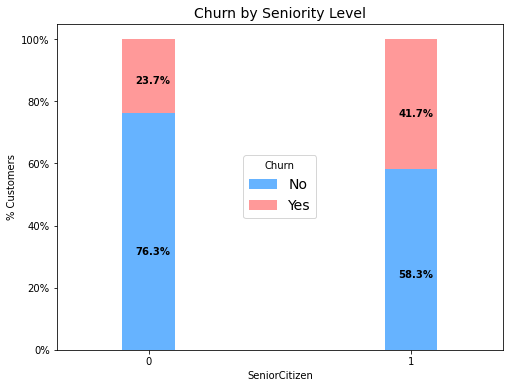

In [13]:
colors = ['#66b3ff','#ff9999']
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'black',
               weight = 'bold')

### Type of plan adapted by customers

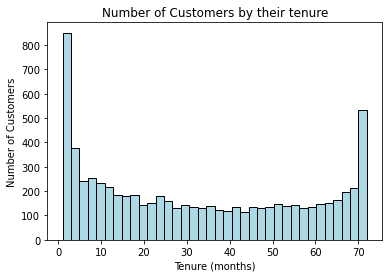

In [14]:
plt.hist(df['tenure'],bins=int(180/5),color = 'lightblue',edgecolor = 'black')
plt.ylabel('Number of Customers')
plt.xlabel('Tenure (months)')
plt.title('Number of Customers by their tenure')
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

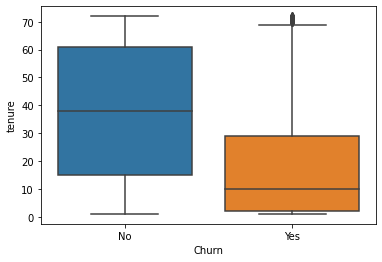

In [15]:
sns.boxplot(x = df.Churn, y = df.tenure)

Text(0.5, 1.0, 'Number of Customers by Contract Type')

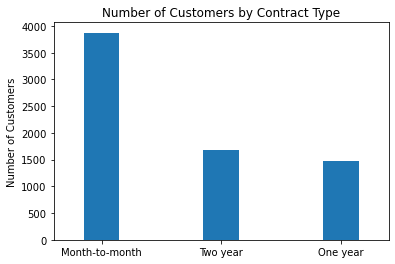

In [16]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

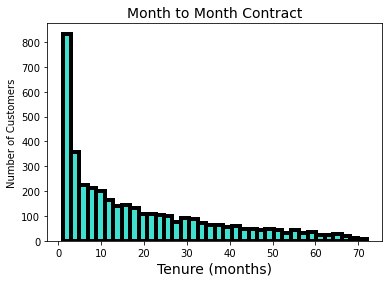

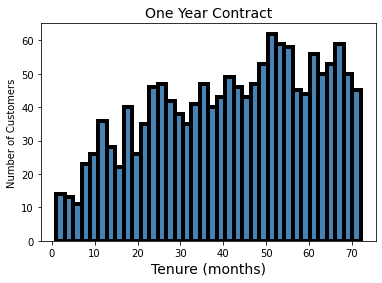

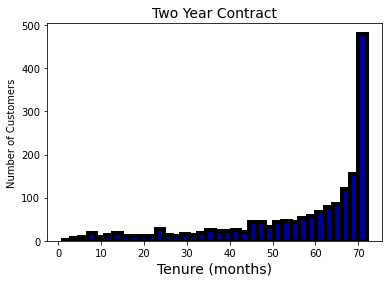

In [17]:


fig1 = plt.hist(df[df['Contract']=='Month-to-month']['tenure'],
                   bins=int(180/5), color = 'turquoise',
                   edgecolor = 'black',
                   linewidth = 4)
plt.ylabel('Number of Customers')
plt.xlabel('Tenure (months)',size = 14)
plt.title('Month to Month Contract',size = 14)
plt.show()

fig2 = plt.hist(df[df['Contract']=='One year']['tenure'],
                   bins=int(180/5), color = 'steelblue',
                   edgecolor='black',
                   linewidth =4)
plt.ylabel('Number of Customers')
plt.xlabel('Tenure (months)',size = 14)
plt.title('One Year Contract',size = 14)
plt.show()

ax3 = plt.hist(df[df['Contract']=='Two year']['tenure'],
                   bins=int(180/5), color = 'darkblue',
                   edgecolor='black',
                   linewidth= 4)

plt.ylabel('Number of Customers')
plt.xlabel('Tenure (months)',size = 14)
plt.title('Two Year Contract',size = 14)
plt.show()

### Customer Churn by plan

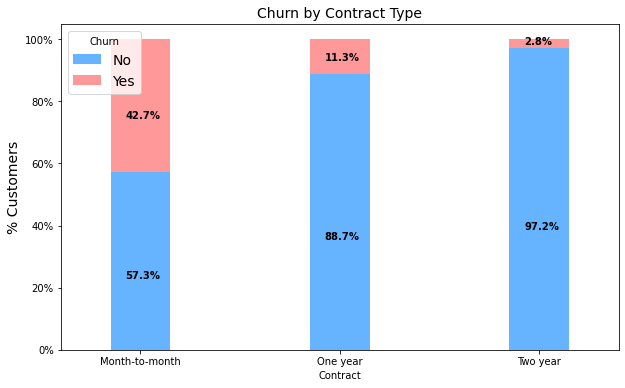

In [18]:
colors = ['#66b3ff','#ff9999']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'black',
               weight = 'bold')

### Monthly and Total Charges

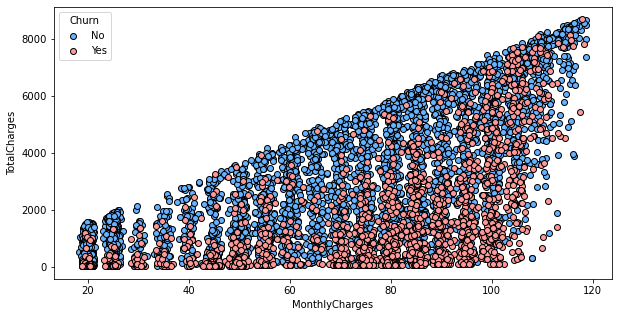

In [19]:

# Customers having more monthly charges but less total charge are more likely to churn. 

plt.figure(figsize=(10, 5))

x1 = df[df['Churn']=='No']['MonthlyCharges'].to_list()
y1 = df[df['Churn']=='No']['TotalCharges']
plt.scatter(x = x1, y=y1, c='#66b3ff',edgecolors='black')

x2=df[df['Churn']=='Yes']['MonthlyCharges'].to_list()
y2=df[df['Churn']=='Yes']['TotalCharges']
plt.scatter(x = x2, y= y2, c='#ff9999',edgecolors='black')

plt.legend(["No","Yes"],loc='best',title = 'Churn')
plt.xlabel ('MonthlyCharges')
plt.ylabel('TotalCharges')


plt.show()


### Feature Correlation

In [20]:
corr_df = pd.get_dummies(df.drop(['customerID','tenure'],axis = 1)).corr()
a = corr_df['Churn_Yes'].sort_values().iloc[1:-1]
a

Contract_Two year                         -0.301552
InternetService_No                        -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
StreamingMovies_No internet service       -0.227578
TotalCharges                              -0.199484
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

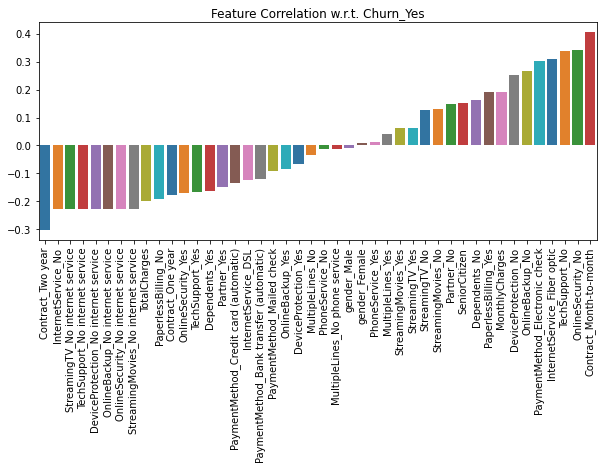

In [21]:
plt.figure(figsize=(10, 4))
sns.barplot(x= a.index, y= a.values, palette= sns.color_palette())
plt.title("Feature Correlation w.r.t. Churn_Yes")
plt.xticks(rotation= 90)
plt.show()